<a href="https://colab.research.google.com/github/SandunGitHub/UOM_Research/blob/main/Section_03_Personal_Research_ProjectDFU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#development of segment thermogram image from the background
#seperate it into 4 angiosomes
#parameter extraction
#check the section 01 code
#Nededed to be added more parameters such as the Hot Spot Estimator (HSE), Estimated Temperature Difference (ETD) #implement those algorithm in section 1 to calaculate the feature importance

#colored images to study the wound progression
#The codes should include pre-processing, post-processing
#get the images in real time from real camera image






Investigation of pre-processing and post processing algorithm on extracting features in the image

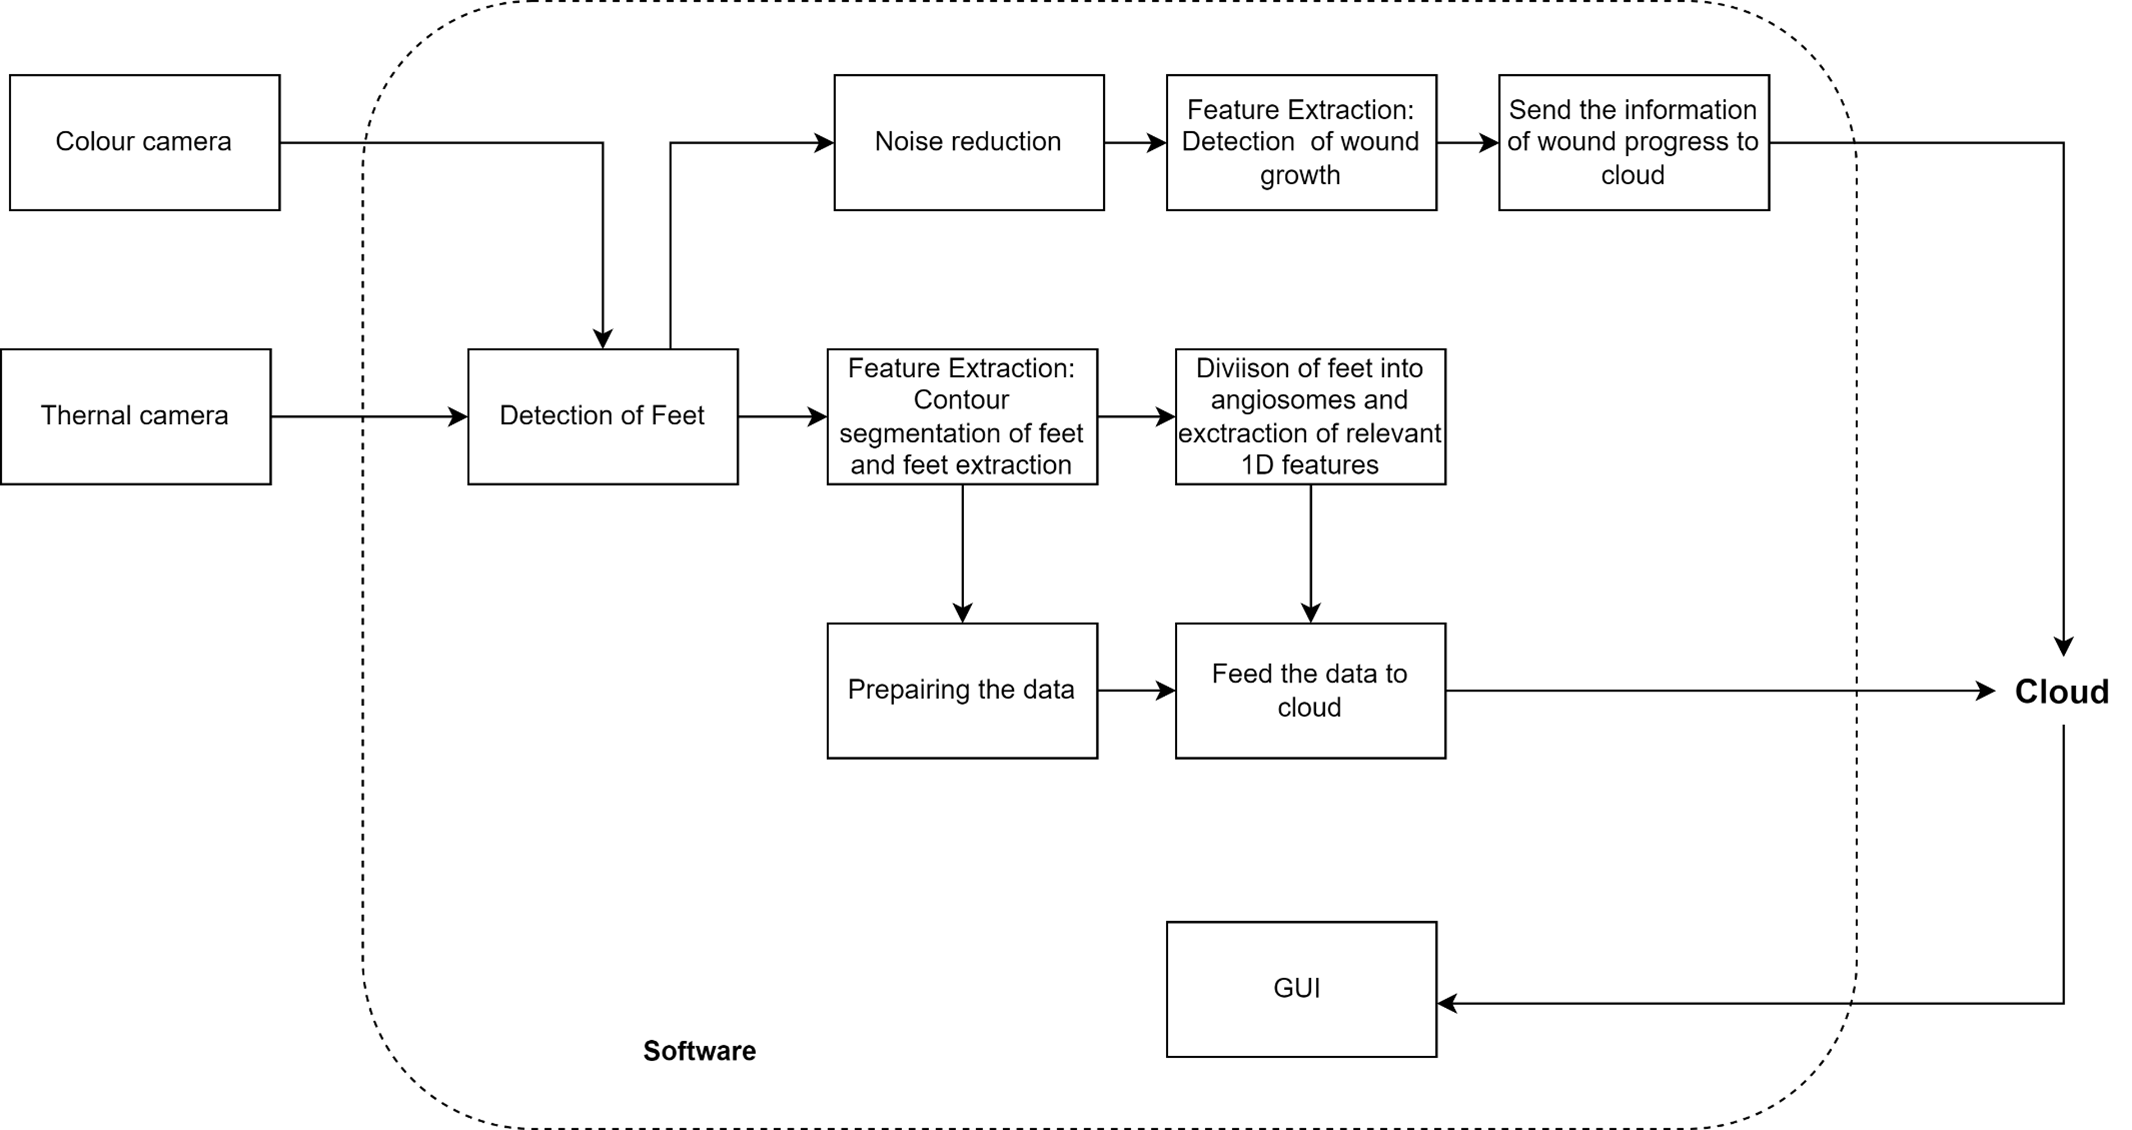

In [ ]:
#detection of the feet
#SSD algorithm is picked for detecting feet and will be tested in Raspberry pi
#SSD algorithm is to be tested for detecting feet
#feature extarction via active countor segmentation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data, img_as_float
import time
from PIL import Image
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from skimage.segmentation import (morphological_chan_vese,
                                  morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  checkerboard_level_set)

Testing active contour segmentaion

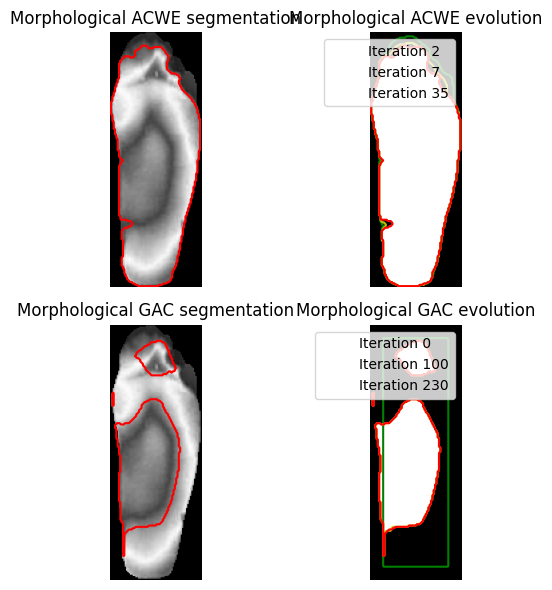

In [ ]:
#initial sucess
def store_evolution_in(lst):
    """Returns a callback function to store the evolution of the level sets in
    the given list.
    """

    def _store(x):
        lst.append(np.copy(x))

    return _store


  # Morphological ACWE
image = cv2.imread('/content/drive/MyDrive/All_Images_Original/CG/CG010_M_L.png')
image = rgb2gray(image)
image = img_as_float(image)

# Initial level set
#there will be problems here in the real time world
init_ls = np.zeros(image.shape, dtype=np.int8)
init_ls[image > 0] = 1
init_ls[image == 0] = 0
# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
ls = morphological_chan_vese(image, num_iter=35, init_level_set=init_ls,
                             smoothing=1, iter_callback=callback)

fig, axes = plt.subplots(2, 2, figsize=(6, 6))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].contour(ls, [0.5], colors='r')
ax[0].set_title("Morphological ACWE segmentation", fontsize=12)

ax[1].imshow(ls, cmap="gray")
ax[1].set_axis_off()
contour = ax[1].contour(evolution[2], [0.5], colors='g')
contour.collections[0].set_label("Iteration 2")
contour = ax[1].contour(evolution[7], [0.5], colors='y')
contour.collections[0].set_label("Iteration 7")
contour = ax[1].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration 35")
ax[1].legend(loc="upper right")
title = "Morphological ACWE evolution"
ax[1].set_title(title, fontsize=12)

#seems partial sucess
# Morphological GAC
image = img_as_float(image)
gimage = inverse_gaussian_gradient(image)

# Initial level set
init_ls = np.zeros(image.shape, dtype=np.int8)
init_ls[10:-10, 10:-10] = 1
# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
ls = morphological_geodesic_active_contour(gimage, num_iter=500,
                                           init_level_set=init_ls,
                                           smoothing=1, balloon=-1,
                                           threshold=0.69,
                                           iter_callback=callback)

ax[2].imshow(image, cmap="gray")
ax[2].set_axis_off()
ax[2].contour(ls, [0.5], colors='r')
ax[2].set_title("Morphological GAC segmentation", fontsize=12)

ax[3].imshow(ls, cmap="gray")
ax[3].set_axis_off()
contour = ax[3].contour(evolution[0], [0.5], colors='g')
contour.collections[0].set_label("Iteration 0")
contour = ax[3].contour(evolution[100], [0.5], colors='y')
contour.collections[0].set_label("Iteration 100")
contour = ax[3].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration 230")
ax[3].legend(loc="upper right")
title = "Morphological GAC evolution"
ax[3].set_title(title, fontsize=12)

fig.tight_layout()
plt.show()




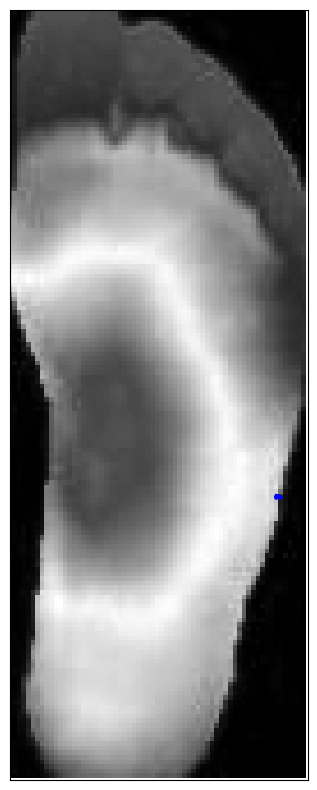

In [ ]:
#acrive countour model seems not working well!

#file directory
CG_directory = '/content/drive/MyDrive/All_Images/CG'
DM_directory = '/content/drive/MyDrive/All_Images/DM'

CG_directory = os.listdir(CG_directory)
DM_directory = os.listdir(DM_directory)

CG_jpg_files         = [filename for filename in CG_directory if filename.endswith('.jpg')]
DM_jpg_files         = [filename for filename in DM_directory if filename.endswith('.jpg')]

#testing it for a single image

single_picture = cv2.imread('/content/drive/MyDrive/All_Images/CG/image_1.jpg')
single_picture = rgb2gray(single_picture)
s = np.linspace(0, 2*np.pi, 400)
r = 100 + 100*np.sin(s)
c = 220 + 100*np.cos(s)
init = np.array([r, c]).T


#chekoing the adaptive way of segmenting the foot
snake = active_contour(gaussian(single_picture,5, preserve_range=False),
                       init, alpha=0.015, beta=1, gamma=0.001)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(single_picture, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, single_picture.shape[1], single_picture.shape[0], 0])

plt.show()









Single Shot Detector  (SSD)
The accuracy can be really low on the detecting feet
Let's turn into DL approaches for example : SSD anf YOLO

In [ ]:
#dataset is available at MyDrive/ All_Images
#clone tensorflow and model repository

# !git clone https://github.com/tensorflow/models.git
# pip install --upgrade tensorflow
# pip install --upgrade tf-models-official




In [ ]:
!cd models/research/ && protoc object_detection/protos/*.proto --python_out=

: No such file or directory

In [ ]:
#installation of objedct detction API
!cd models/research && \
    cp object_detection/packages/tf2/setup.py . && \
    python -m pip install .


Processing /content/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done

In [ ]:
#import libraries
#installed protobuf sucessfully
#importing other necessary libraies

# import pathlib
# import tensorflow as tf
# import time
# from object_detection.utils import label_map_util
# from object_detection.utils import visualization_utils as viz_utils



We had finisghed installing a all the set of libraries, Now we can perfoerm custom training
We will train using the SSD algorithm



https://imageai.readthedocs.io/en/latest/customdetection/index.html


In [ ]:
#Preperation of data set about 200 from each data
#Lets aquire the data readings their edges and store them

import cv2
CG_directory = '/content/drive/MyDrive/All_Images/CG'
DM_directory = '/content/drive/MyDrive/All_Images/DM'

CG_directory = os.listdir(CG_directory)
DM_directory = os.listdir(DM_directory)

CG = len(CG_directory)
DM = len(DM_directory)

print(CG)
print(DM)

#prepatre a canny edge detction

img = cv2.imread("/content/drive/MyDrive/All_Images_Original/CG/CG001_M_L.png")  # Read image
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img2 = cv2.imread("/content/drive/MyDrive/All_Images_Original/CG/CG001_M_R.png")  # Read image
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


t_lower = 50  # Lower Threshold
t_upper = 150  # Upper threshold
L2Gradient = True  # Boolean

# Applying the Canny Edge filter
edge = cv2.Canny(img, t_lower, t_upper, L2gradient=L2Gradient)
edge2 = cv2.Canny(img2, t_lower, t_upper, L2gradient=L2Gradient)

# Display the original and edge-detected images
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # OpenCV uses BGR, matplotlib uses RGB
plt.title("Original Image")

# Display the edge-detected image
plt.subplot(2, 2, 2)
plt.imshow(edge, cmap="gray")  # Display in grayscale
plt.title("Canny Edge Detection")

plt.show()


# Display the original image
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))  # OpenCV uses BGR, matplotlib uses RGB
plt.title("Original Image")

# Display the edge-detected image
plt.subplot(2, 2, 4)
plt.imshow(edge2, cmap="gray")  # Display in grayscale
plt.title("Canny Edge Detection")

plt.show()





1800
1800


NameError: ignored

Data base preperation
includes two sets of classes
Left and right leg









In [ ]:
import os
import cv2
from PIL import Image
import PIL
import time
import imgaug.augmenters as iaa
import datetime

RIGHT_LEG =[]
LEFT_LEG = []

CG_directory = '/content/drive/MyDrive/All_Images_Original/CG'
DM_directory = '/content/drive/MyDrive/All_Images_Original/DM'

CG_directory_ = os.listdir(CG_directory)
DM_directory_ = os.listdir(DM_directory)

CG = len(CG_directory)
DM = len(DM_directory)
#lets take the DM data and detect the edges
DM_png_files_L          = [filename for filename in DM_directory_ if '_L' in filename and filename.endswith('.png')]
DM_png_files_R          = [filename for filename in DM_directory_ if '_R' in filename and filename.endswith('.png')]

CG_png_files_L          = [filename for filename in CG_directory_ if '_L' in filename and filename.endswith('.png')]
CG_png_files_R          = [filename for filename in CG_directory_ if '_R' in filename and filename.endswith('.png')]

t_lower = 50  # Lower Threshold
t_upper = 150  # Upper threshold
L2Gradient = True  # Boolean
image_count = 0

def saving_the_image(augmented_image,output_directory):
  global image_count
  image_count = image_count+1
  file_name = f'image_{image_count}.jpg'
  output_file_path = os.path.join(output_directory, file_name)
  i = Image.fromarray(augmented_image)
  i.save(output_file_path)
  time.sleep(0.1)


output_file_path_L = '/content/drive/MyDrive/Feet_Detection/Left_Leg'
for image in DM_png_files_L:
  img = cv2.imread(os.path.join(DM_directory,image))  # Read image
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Applying the Canny Edge filter
  edge = cv2.Canny(img, t_lower, t_upper, L2gradient=L2Gradient)
  saving_the_image(edge,output_file_path_L)

# output_file_path_R = '/content/drive/MyDrive/Feet_Detection/Right_Leg'
for image in CG_png_files_L:
  img = cv2.imread(os.path.join(CG_directory,image))  # Read image
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Applying the Canny Edge filter
  edge = cv2.Canny(img, t_lower, t_upper, L2gradient=L2Gradient)
  saving_the_image(edge,output_file_path_L)









In [ ]:

output_file_path_R = '/content/drive/MyDrive/Feet_Detection/Right_Leg'
for image in DM_png_files_R :
  img = cv2.imread(os.path.join(DM_directory,image))  # Read image
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Applying the Canny Edge filter
  edge = cv2.Canny(img, t_lower, t_upper, L2gradient=L2Gradient)
  saving_the_image(edge,output_file_path_R)

# output_file_path_R = '/content/drive/MyDrive/Feet_Detection/Right_Leg'
for image in CG_png_files_R :
  img = cv2.imread(os.path.join(CG_directory,image))  # Read image
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Applying the Canny Edge filter
  edge = cv2.Canny(img, t_lower, t_upper, L2gradient=L2Gradient)
  saving_the_image(edge,output_file_path_R)





In [7]:
train  = '/content/drive/MyDrive/Dataset_Feet/train/images'
validation = '/content/drive/MyDrive/Dataset_Feet/validation/images'

train_images = os.listdir(train )
validation_images = os.listdir(validation)

train         = [filename for filename in train_images if  filename.endswith('.jpg')]
validation         = [filename for filename in validation_images if  filename.endswith('.jpg')]
print(len(train))
print(len(validation))

#change of the ways of doing it

267
67


In [ ]:
import cv2
import os
import numpy as np

CG_directory = '/content/drive/MyDrive/All_Images_Original/CG'
DM_directory = '/content/drive/MyDrive/All_Images_Original/DM'

# List of image file names
image_files = [
    'CG001_M_L.png', 'CG001_M_R.png', 'CG002_M_L.png', 'CG002_M_R.png',  # Add all your file names here
]

# Create a dictionary to store images with the same base name

array = []
# Iterate through the grouped images and concatenate them
# for base_name, image_list in Image_dict.items():
left_right_leg = [_ for _ in image_files if "CG001" in _]
IMG_LEFT = []
IMG_RIGHT = []
LI = []
RI = []


for base_name in left_right_leg:
  if "_L_" in base_name:
    img = cv2.imread(os.path.join(CG_directory,image))  # Read image
    # Applying the Canny Edge filter
    edge = cv2.Canny(img, t_lower, t_upper, L2gradient=L2Gradient)
    LI = Image.fromarray(edge)

  elif "_R_" in base_name:
    img = cv2.imread(os.path.join(CG_directory,image))  # Read image
    # Applying the Canny Edge filter
    edge = cv2.Canny(img, t_lower, t_upper, L2gradient=L2Gradient)
    RI = Image.fromarray(edge)

  # Check if both left and right images are present before concatenating
  if LI is not None and RI is not None:
      # Concatenate the images horizontally
      concatenated_image = cv2.hconcat([np.array(LI), np.array(RI)])
      # Save the concatenated image
      output_directory = '/content/drive/MyDrive/test_output_file'  # You can specify the desired output file name
      file_name = 'CG001concat.jpg'
      output_file_path = os.path.join(output_directory, file_name)
      i = Image.fromarray(concatenated_image)
      i.save(output_file_path)
      time.sleep(0.1)
      print(f"Concatenated left and right images into {output_directory}")
  else:
      print("No matching left and right images found.")



    # if base_name in image_files :  # Check if there are two images with the same base name
    #     left_image = cv2.imread(image_files[0])
    #     right_image = cv2.imread(image_files[1])
    #     concatenated_image = cv2.hconcat([left_image, right_image])

    #     # Save the concatenated image
    #     output_file = f"{base_name}_concatenated.png"
    #     Image_dict[f"{base_name}"]["data"] = cv2.imwrite(output_file, concatenated_image)

    #     print(f"Concatenated {image_list[0]} and {image_list[1]} into {output_file}")
    # else:
    #     print(f"Skipping {base_name} because it doesn't have a pair of images")


AttributeError: ignored

In [ ]:
import os
import cv2
from PIL import Image
import PIL
import time
import imgaug.augmenters as iaa
import datetime

RIGHT_LEG =[]
LEFT_LEG = []

CG_directory = '/content/drive/MyDrive/All_Images_Original/CG'
DM_directory = '/content/drive/MyDrive/All_Images_Original/DM'

CG_directory_ = os.listdir(CG_directory)
DM_directory_ = os.listdir(DM_directory)

CG = len(CG_directory)
DM = len(DM_directory)
#lets take the DM data and detect the edges
DM_png_files_L          = [filename for filename in DM_directory_ if '_L' in filename and filename.endswith('.png')]
DM_png_files_R          = [filename for filename in DM_directory_ if '_R' in filename and filename.endswith('.png')]

CG_png_files_L          = [filename for filename in CG_directory_ if '_L' in filename and filename.endswith('.png')]
CG_png_files_R          = [filename for filename in CG_directory_ if '_R' in filename and filename.endswith('.png')]

t_lower = 50  # Lower Threshold
t_upper = 150  # Upper threshold
L2Gradient = True  # Boolean
image_count = 0

def saving_the_image(augmented_image,output_directory,image):
  global image_count
  image_count = image_count+1
  file_name = f'{image}'
  output_file_path = os.path.join(output_directory, file_name)
  i = Image.fromarray(augmented_image)
  i.save(output_file_path)
  time.sleep(0.1)


output_file_path_L = '/content/drive/MyDrive/Feet_Detection_/Left_Leg'
for image in DM_png_files_L:
  img = cv2.imread(os.path.join(DM_directory,image))  # Read image
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Applying the Canny Edge filter
  edge = cv2.Canny(img, t_lower, t_upper, L2gradient=L2Gradient)
  saving_the_image(edge,output_file_path_L,image)

# output_file_path_R = '/content/drive/MyDrive/Feet_Detection/Right_Leg'
for image in CG_png_files_L:
  img = cv2.imread(os.path.join(CG_directory,image))  # Read image
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Applying the Canny Edge filter
  edge = cv2.Canny(img, t_lower, t_upper, L2gradient=L2Gradient)
  saving_the_image(edge,output_file_path_L,image)









In [ ]:
output_file_path_R = '/content/drive/MyDrive/Feet_Detection_/Right_Leg'
for image in DM_png_files_R :
  img = cv2.imread(os.path.join(DM_directory,image))  # Read image
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Applying the Canny Edge filter
  edge = cv2.Canny(img, t_lower, t_upper, L2gradient=L2Gradient)
  saving_the_image(edge,output_file_path_R,image)

# output_file_path_R = '/content/drive/MyDrive/Feet_Detection/Right_Leg'
for image in CG_png_files_R :
  img = cv2.imread(os.path.join(CG_directory,image))  # Read image
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Applying the Canny Edge filter
  edge = cv2.Canny(img, t_lower, t_upper, L2gradient=L2Gradient)
  saving_the_image(edge,output_file_path_R,image)

In [2]:
import os

Left_leg  = '/content/drive/MyDrive/Feet_Detection_/Left_Leg'
Right_leg ='/content/drive/MyDrive/Feet_Detection_/Right_Leg'

left_leg = os.listdir(Left_leg )
Right_leg = os.listdir(Right_leg)

left = len(left_leg)
Right = len(Right_leg )
#lets take the DM data and detect the edges
left_leg           =  [filename for filename in left_leg   if  filename.endswith('.png')]
Right_leg          =  [filename for filename in Right_leg   if filename.endswith('.png')]



In [1]:
!pip install imageai

Training the SSD to detct the foot

In [ ]:
#training the model after preperation of the data
import imageai
from imageai.Detection.Custom import DetectionModelTrainer


trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory="/content/drive/MyDrive/Dataset_Feet")
trainer.setTrainConfig(object_names_array=["/content/drive/MyDrive/Dataset_Feet"], batch_size=16, num_experiments=5, train_from_pretrained_model="yolov3.pt")
trainer.trainModel()


/usr/local/lib/python3.10/dist-packages/imageai/Detection/Custom/yolo/dataset.py:80: UserWarning: loadtxt: input contained no data: "/content/drive/MyDrive/Dataset_Feet/train/annotations/image_213.txt"
  l = np.loadtxt(label_path).reshape(-1,5)


Generating anchor boxes for training images...
thr=0.25: 1.0000 best possible recall, 9.00 anchors past thr
n=9, img_size=416, metric_all=0.874/0.984-mean/best, past_thr=0.874-mean: 
pretrained weight loading failed. Defaulting to using random weight.
Pretrained YOLOv3 model loaded to initialize weights
Epoch 1/5
----------
Train: 


25it [28:46, 69.08s/it]


    box loss-> 0.05020, object loss-> 0.30075, class loss-> 0.00000
Validation:


13it [02:03,  9.48s/it]


    recall: 0.000000 precision: 0.000000 mAP@0.5: 0.000000, mAP@0.5-0.95: 0.000000

Epoch 2/5
----------
Train: 


2it [02:10, 65.25s/it]

The models is unxderfit. We have to train data more. Lets improve the data by concatinating the both left and right images. Checked with more data, but the accuracy is low. Feed more data and see.

In [11]:
def saving_the_image(augmented_image,output_directory,image):
  global image_count
  image_count = image_count+1
  file_name = f'{image}'
  output_file_path = os.path.join(output_directory, file_name)
  i = Image.fromarray(augmented_image)
  i.save(output_file_path)
  time.sleep(0.1)

['CG005_F', 'CG006_F', 'CG001_M', 'CG008_F', 'CG007_F', 'CG009_M', 'CG004_F', 'CG002_M', 'CG003_M', 'CG010_M', 'CG011_F', 'CG015_M', 'CG019_F', 'CG012_F', 'CG020_F', 'CG018_M', 'CG014_M', 'CG013_M', 'CG017_F', 'CG016_M', 'CG027_M', 'CG029_F', 'CG028_M', 'CG026_M', 'CG030_M', 'CG024_F', 'CG023_F', 'CG022_M', 'CG025_M', 'CG021_M', 'CG040_M', 'CG031_M', 'CG032_M', 'CG037_M', 'CG035_M', 'CG033_M', 'CG039_M', 'CG034_M', 'CG036_M', 'CG038_M', 'CG042_F', 'CG044_F', 'CG041_F', 'CG043_M', 'CG045_M']


Text(0.5, 1.0, 'combined  Image')

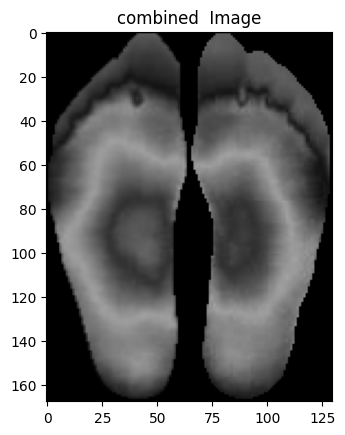

In [106]:
# control group
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

CG_group_path = '/content/drive/MyDrive/Feet_Original_Data/CG Group'
CG_group = os.listdir(CG_group_path)
print(CG_group)

#testing it for a single imaage

t_lower = 50  # Lower Threshold
t_upper = 150  # Upper threshold
L2Gradient = True  # Boolean
image_count = 0

#automate the procedure
CG_group_image = '/content/drive/MyDrive/Feet_Original_Data/CG Group/CG001_M'
CG_internal_files = os.listdir(CG_group_image )

internal_files =  [filename for filename in CG_group]
internal_files = sorted(internal_files)
left_leg       =  [filename for filename in CG_internal_files   if '_L' in filename and filename.endswith('.png')]
left_leg       = sorted(left_leg)
right_leg      =  [filename for filename in CG_internal_files   if '_R' in filename and filename.endswith('.png')]
right_leg      = sorted(right_leg)

left_leg_path  = os.path.join(CG_group_path, internal_files[0])
right_leg_path = os.path.join(CG_group_path, internal_files[0])
left_leg_image = os.path.join(left_leg_path,left_leg[0])
right_leg_image = os.path.join(left_leg_path,right_leg[0])


left_leg_image = cv2.imread(left_leg_image)
right_leg_image = cv2.imread(right_leg_image)
#image shape
desired_image_height = left_leg_image.shape[0] #height
desired_image_width = left_leg_image.shape[1] #width
left_leg_image_gray = cv2.cvtColor(left_leg_image, cv2.COLOR_BGR2GRAY)
right_leg_image_gray = cv2.cvtColor(right_leg_image, cv2.COLOR_BGR2GRAY)
right_leg_image_gray = cv2.resize(right_leg_image_gray, (desired_image_width, desired_image_height))
concatenated_image = np.concatenate((right_leg_image_gray , left_leg_image_gray ), axis=1)

plt.subplot(1,1,1)
plt.imshow(cv2.cvtColor(concatenated_image, cv2.COLOR_BGR2RGB))  # OpenCV uses BGR, matplotlib uses RGB
plt.title("combined  Image")

#sucess
#loop
# CG_group_all_path = '/content/drive/MyDrive/Feet_Original_Data/CG Group/'
# CG_internal_files = os.listdir(CG_group_all_path)
# CG_internal_files = sorted(CG_internal_files)
# # Create a list of full file paths
# internal_files = [os.path.join(CG_group_all_path, filename) for filename in CG_internal_files]
# print(internal_files)
# # Concatenate the file paths into a single string
# CG_group_images = "\n".join(internal_files)
# print(CG_group_images)



























In [128]:
# control group
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

# CG_group_path = '/content/drive/MyDrive/Feet_Original_Data/CG Group'
# CG_group = os.listdir(CG_group_path)
# print(CG_group)

#testing it for a single imaage

t_lower = 50  # Lower Threshold
t_upper = 150  # Upper threshold
L2Gradient = True  # Boolean
image_count = 0

#automate the procedure
# CG_group_image = '/content/drive/MyDrive/Feet_Original_Data/CG Group/CG001_M'
output_file_path = "/content/drive/MyDrive/Feet_Original_Data/New_DataSet"

# CG_group_all_path = '/content/drive/MyDrive/Feet_Original_Data/CG Group/'
# CG_internal_files = os.listdir(CG_group_all_path)
# CG_internal_files = sorted(CG_internal_files)
DM_group_all_path = '/content/drive/MyDrive/Feet_Original_Data/DM Group/'
DM_internal_files = os.listdir(DM_group_all_path)
DM_internal_files = sorted(DM_internal_files)

# Create a list of full file paths
internal_files = [os.path.join(DM_group_all_path, filename) for filename in DM_internal_files]

for data in internal_files:
  left_leg       =  [filename for filename in os.listdir(data)   if '_L' in filename and filename.endswith('.png')]
  left_leg       = sorted(left_leg)
  right_leg      =  [filename for filename in os.listdir(data)   if '_R' in filename and filename.endswith('.png')]
  right_leg      = sorted(right_leg)
  left_leg_image  = cv2.imread(f"{data}"+f"/{left_leg[0]}")
  right_leg_image = cv2.imread(f"{data}"+f"/{right_leg[0]}")
  #image shape
  desired_image_height = left_leg_image.shape[0] #height
  desired_image_width = left_leg_image.shape[1] #width
  left_leg_image_gray = cv2.cvtColor(left_leg_image, cv2.COLOR_BGR2GRAY)
  right_leg_image_gray = cv2.cvtColor(right_leg_image, cv2.COLOR_BGR2GRAY)
  right_leg_image_gray = cv2.resize(right_leg_image_gray, (desired_image_width, desired_image_height))
  concatenated_image = np.concatenate((right_leg_image_gray , left_leg_image_gray ), axis=1)
  concatenated_image_edge = cv2.Canny(concatenated_image , t_lower, t_upper, L2gradient=L2Gradient)
  image = f"{left_leg}combined{right_leg}.png"
  saving_the_image(concatenated_image_edge,output_file_path,image)


  # plt.subplot(1,1,1)
  # plt.imshow(cv2.cvtColor(concatenated_image, cv2.COLOR_BGR2RGB))  # OpenCV uses BGR, matplotlib uses RGB
  # plt.title("combined  Image")


